<a href="https://colab.research.google.com/github/Kazuyasus/Econometrics/blob/main/5th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# 作業ディレクトリの設定
# GitHubのdataを利用
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/criminal.csv"

# CSVを読み込む
df=pd.read_csv(url)


In [ ]:
# 変数の対数変換（0をNaNに置き換える）
df["lncrime"] = np.log(df["crime"].replace(0, np.nan))
df["lnunemp"] = np.log(df["unemp"].replace(0, np.nan))
df["lnpop"] = np.log(df["pop"].replace(0, np.nan))


In [ ]:
# 最小二乗法(単回帰)その1
ols_s = smf.ols("lncrime ~ lnunemp", data=df).fit()
# 結果を表示
print(ols_s.summary())


                            OLS Regression Results                            
Dep. Variable:                lncrime   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:58:46   Log-Likelihood:                -1592.1
No. Observations:                1726   AIC:                             3188.
Df Residuals:                    1724   BIC:                             3199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4395      0.064    -37.873      0.0

In [ ]:
# 最小二乗法(単回帰)その2
# 線形回帰に使用するライブラリの読み込み
formula = 'lncrime ~ lnunemp'  # formula = y ~ x と記述する
model = ols(formula, data=df).fit() # 均一分散

# 結果を表示
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                lncrime   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:58:54   Log-Likelihood:                -1592.1
No. Observations:                1726   AIC:                             3188.
Df Residuals:                    1724   BIC:                             3199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4395      0.064    -37.873      0.0

In [ ]:
# 最小二乗法(重回帰)
ols_m = smf.ols("lncrime ~ lnunemp + lnpop", data=df).fit()
print(ols_m.summary())

                            OLS Regression Results                            
Dep. Variable:                lncrime   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:58:58   Log-Likelihood:                -1342.4
No. Observations:                1726   AIC:                             2691.
Df Residuals:                    1723   BIC:                             2707.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9770      0.197    -35.455      0.0

In [ ]:
# 交差項を含む重回帰
df["lnunemp_pop"] = df["lnunemp"] * df["lnpop"]
ols_int = smf.ols("lncrime ~ lnunemp + lnpop + lnunemp_pop", data=df).fit()
print(ols_int.summary())

                            OLS Regression Results                            
Dep. Variable:                lncrime   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6855.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:59:01   Log-Likelihood:                -1342.4
No. Observations:                1726   AIC:                             2693.
Df Residuals:                    1722   BIC:                             2715.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.8935      0.386    -17.844      

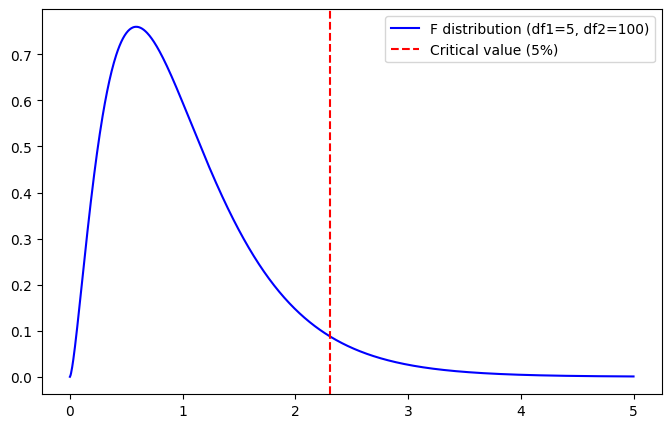

In [ ]:
# F分布のプロット
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, 5, 100)
threshold = stats.f.ppf(0.95, 5, 100)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="blue", linestyle="solid", label="F distribution (df1=5, df2=100)")
plt.axvline(threshold, color="red", linestyle="dashed", label="Critical value (5%)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()